In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# remove first column
df = df.iloc[:,1:]

# convert price column to int
df['Price'] = df['Price'].astype(int)

# remove "GB" from ram column and make it int 
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

# make the inches an int column by flooring the current decimal values
df['Inches'] = df['Inches'].apply(lambda x: np.floor(x)).astype(int)    

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

df['X_res'] = df['ScreenResolution'].str.split('x').str[0].str.strip()
df['Y_res'] = df['ScreenResolution'].str.split('x').str[1].str.strip()



In [5]:
import re

def extract_4_digit_number(input_string):
    # Define a regular expression pattern to match a 4-digit number
    pattern = r'\b\d{4}\b'

    # Use re.findall to extract all occurrences of the pattern in the input string
    matches = re.findall(pattern, input_string)

    # If there are matches, return the first one; otherwise, return None
    return matches[0] if matches else None

# apply this function to the X_res column
df['X_res'] = df['X_res'].apply(lambda x: extract_4_digit_number(x))

In [6]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)
df['Touchscreen'] = df['Touchscreen'].astype('boolean')


In [7]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype(float)

In [8]:
df['cpu_name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [9]:
def cpu_brand(x):
    if 'Intel Core i3' in x:
        return 'Intel Core i3'
    elif 'Intel Core i5' in x:
        return 'Intel Core i5'
    elif 'Intel Core i7' in x:
        return 'Intel Core i7'
    elif 'Intel Core i9' in x:
        return 'Intel Core i9'
    else:
        if 'AMD' in x:
            return 'AMD Processor'
        else:
            return 'Other Intel Processor'
    
df['cpu_brand'] = df['Cpu'].apply(cpu_brand)

In [10]:
df.drop(['Cpu', 'cpu_name'], axis=1, inplace=True)

In [11]:
# drop x_res, y_res, screen resolution
df.drop(['X_res', 'Y_res', 'ScreenResolution'], axis=1, inplace=True)

In [18]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand
447,Dell,Workstation,15,8,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23,106187,0,0,146.860478,Other Intel Processor
142,Lenovo,Gaming,15,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,46300,0,1,146.860478,Intel Core i7
360,HP,Notebook,15,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389,0,0,104.472857,Intel Core i3
143,Toshiba,Notebook,15,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,32074,0,0,104.472857,Intel Core i5
684,Lenovo,2 in 1 Convertible,13,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19,79866,1,1,169.454398,Intel Core i7


In [15]:
# convert touch screen to 1 and 0

df['Touchscreen'] = df['Touchscreen'].astype('int')

In [17]:
# remove "kg" from weight column and make it float
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

In [26]:
# Create new columns with default values of 0
df['HDD'] = 0
df['SSD'] = 0
df['Hybrid'] = 0
df['Flash_Storage'] = 0

# Update columns based on the 'Memory' column
for index, row in df.iterrows():
    memory_types = row['Memory'].split('+')
    for memory_type in memory_types:
        memory_type = memory_type.strip()
        capacity_str = ''.join(filter(str.isdigit, memory_type))  # Extract digits
        if 'HDD' in memory_type:
            df.at[index, 'HDD'] = int(capacity_str) * 1000 if 'TB' in memory_type else int(capacity_str)
        elif 'SSD' in memory_type:
            df.at[index, 'SSD'] = int(capacity_str) * 1000 if 'TB' in memory_type else int(capacity_str)
        elif 'Hybrid' in memory_type:
            df.at[index, 'Hybrid'] = int(capacity_str) * 1000 if 'TB' in memory_type else int(capacity_str)
        elif 'Flash' in memory_type:
            df.at[index, 'Flash_Storage'] = int(capacity_str) * 1000 if 'TB' in memory_type else int(capacity_str)



In [28]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1119,Asus,Gaming,17,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929,0,0,129.582775,Intel Core i7,1000,128,0,0
852,Dell,Notebook,17,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,46087,0,0,129.582775,Intel Core i7,1000,0,0,0
401,Asus,Gaming,17,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,81465,0,0,129.582775,Intel Core i7,1000,256,0,0
180,Dell,Notebook,15,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,55890,0,0,146.860478,Intel Core i7,2000,256,0,0
645,Lenovo,Notebook,14,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.43,14598,0,0,111.935204,Other Intel Processor,0,0,0,32


In [29]:
# drop memory column
df.drop(['Memory'], axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   int64  
 3   Ram            1303 non-null   int64  
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float64
 7   Price          1303 non-null   int64  
 8   Touchscreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  cpu_brand      1303 non-null   object 
 12  HDD            1303 non-null   int64  
 13  SSD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  Flash_Storage  1303 non-null   int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 163.0+ KB


/tmp/ipykernel_8095/3150714434.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<AxesSubplot: >

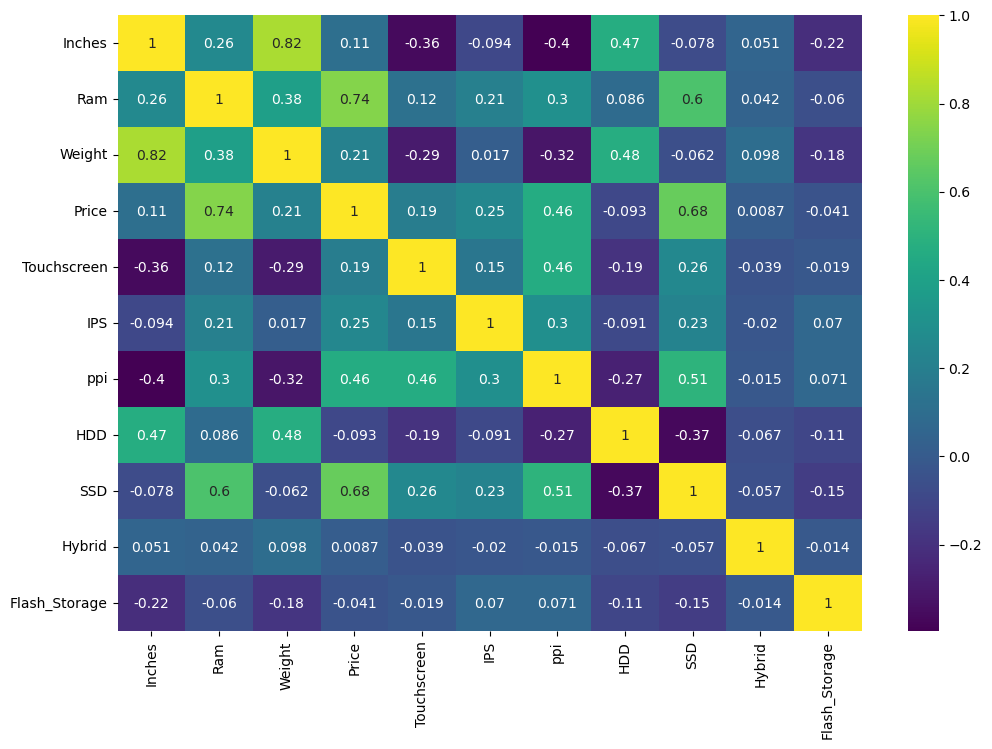

In [31]:
# check correlation of all columns with the price column using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')


In [32]:
# drop hybrid and flash storage columns
df.drop(['Hybrid', 'Flash_Storage'], axis=1, inplace=True)


In [33]:
df.sample(5)


,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD
1010,Dell,Gaming,15,8,Nvidia GeForce GTX 1050,Windows 10,2.65,50562,0,0,146.860478,Intel Core i5,0,0
1289,Asus,Ultrabook,13,8,Intel HD Graphics 515,Windows 10,1.20,38841,0,1,169.454398,Other Intel Processor,0,512
990,HP,Netbook,12,8,Intel HD Graphics 515,Windows 10,0.97,101658,0,0,183.575598,Other Intel Processor,0,512
755,Lenovo,2 in 1 Convertible,13,8,Intel HD Graphics 540,Windows 10,1.30,63882,1,1,282.423996,Intel Core i5,0,256
1212,MSI,Gaming,17,16,Nvidia GeForce GTX 1060,Windows 10,2.43,103842,0,1,129.582775,Intel Core i7,1000,256


In [34]:
# make new column called gpu brand and extract the brand from the gpu column
def gpu_brand(x):
    if 'Intel' in x:
        return 'Intel'
    elif 'Nvidia' in x:
        return 'Nvidia'
    elif 'AMD' in x:
        return 'AMD'
    else:
        return 'Other'
    
df['gpu_brand'] = df['Gpu'].apply(gpu_brand)    

In [35]:
df.drop(['Gpu'], axis=1, inplace=True)

In [36]:
def categorize_OS(input):
    if 'Windows' in input:
        return 'Windows'
    elif 'Mac' in input:
        return 'Mac'
    else:
        return 'Other'
    
df['OS'] = df['OpSys'].apply(categorize_OS)

In [37]:
df.drop(['OpSys'], axis=1, inplace=True)

In [41]:
df.sample(5)

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,gpu_brand,OS
400,Lenovo,Notebook,15,4,2.20,16303,0,0,104.472857,Other Intel Processor,1000,0,Intel,Windows
1025,HP,Ultrabook,12,4,1.26,83063,0,0,130.591071,Intel Core i5,0,256,Intel,Windows
1243,Dell,2 in 1 Convertible,17,16,2.77,95850,1,0,129.582775,Intel Core i7,0,512,Nvidia,Windows
639,Dell,Notebook,15,16,2.06,127818,1,0,293.720956,Intel Core i7,0,1000,Nvidia,Windows
1209,Asus,Gaming,15,16,2.20,130482,0,0,146.860478,Intel Core i7,1000,256,Nvidia,Windows


/tmp/ipykernel_8095/3150714434.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<AxesSubplot: >

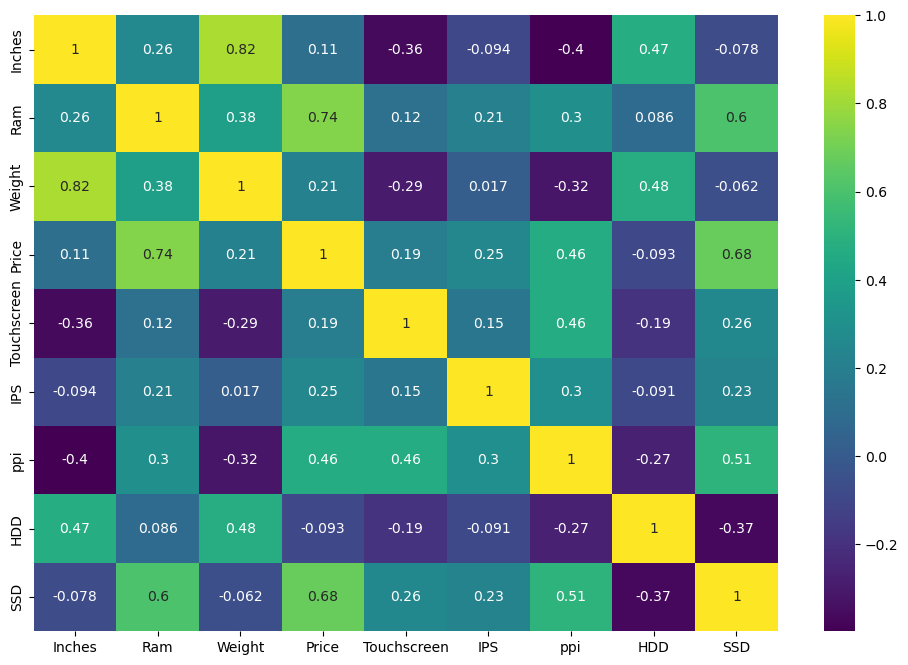

In [42]:
# check correlation of all columns with the price column using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')


In [47]:
# the price column is skewed to the right, so we will use the log function to make it more normally distributed
df['Price'] = np.log(df['Price'])

# reverse this 
df['Price'] = np.exp(df['Price'])

<AxesSubplot: >

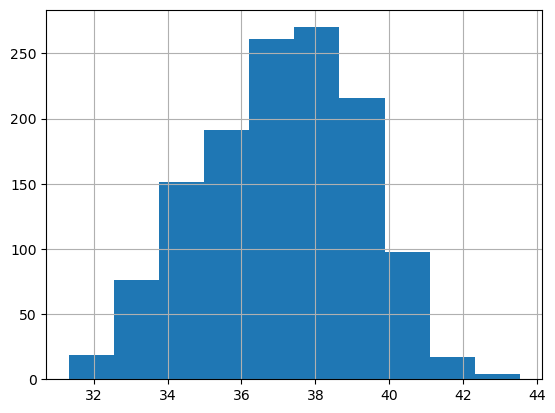

In [48]:
df['Price'].hist()

In [49]:
# these are indian ruppe and we will convert it to pakistani ruppe where 1 indian ruppe = 3.43 pakistani ruppe
df['Price'] = df['Price'].apply(lambda x: x*3.43)


In [50]:
X = df.drop(['Price'], axis=1)
y = np.log(df['Price'])

In [51]:
X

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,gpu_brand,OS
0,Apple,Ultrabook,13,8,1.37,0,1,232.221074,Intel Core i5,0,128,Intel,Other
1,Apple,Ultrabook,13,8,1.34,0,0,130.624354,Intel Core i5,0,0,Intel,Other
2,HP,Notebook,15,8,1.86,0,0,146.860478,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,15,16,1.83,0,1,226.415547,Intel Core i7,0,512,AMD,Other
4,Apple,Ultrabook,13,8,1.37,0,1,232.221074,Intel Core i5,0,256,Intel,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13,16,1.30,1,1,282.423996,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15,6,2.19,0,0,104.472857,Intel Core i7,1000,0,AMD,Windows


In [52]:
y

0       4.878866
1       4.842513
2       4.800166
3       4.934446
4       4.905125
          ...   
1298    4.810179
1299    4.888870
1300    4.706816
1301    4.827304
1302    4.756275
Name: Price, Length: 1303, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

X.head(1)

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,ppi,cpu_brand,HDD,SSD,gpu_brand,OS
0,Apple,Ultrabook,13,8,1.37,0,1,232.221074,Intel Core i5,0,128,Intel,Other


In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 11, 12])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)  

y_pred = pipe.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2 Score: ', r2_score(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('MAE: ', mean_absolute_error(y_test, y_pred)) 


R2 Score:  0.8269775309228142
RMSE:  0.02412919366069263
MAE:  0.01952055447396582


# TEST ALL MODELS BELOW THIS

In [72]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 8, 11, 12])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, bootstrap=True, max_features=0.75, max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Assuming X_train, X_test, y_train, and y_test are defined
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

/home/saad/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8946891820913617
MAE 0.014469431253377808


In [73]:
# export df and pipe
df.to_csv('cleaned_data.csv', index=False)
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))